In [1]:
import numpy as np
import copy
from sklearn import preprocessing
import os
import pandas as pd
from matplotlib import pyplot as plt
from numpy.random import seed
from sklearn.model_selection import train_test_split,cross_val_score
from xgboost import XGBClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer

from collections import Counter
#from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score,precision_score,recall_score,roc_auc_score,accuracy_score,roc_curve
import sklearn.ensemble as se
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from xgboost import plot_importance
import matplotlib.pyplot as plt
from lightgbm.sklearn import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier

import seaborn as sns
%matplotlib inline
from xgboost import plot_importance
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
import warnings
from sklearn.metrics import confusion_matrix
#from imblearn.over_sampling import BorderlineSMOTE

In [2]:
#file = 'diabets.csv'
df = pd.read_excel("dia.xlsx")

In [3]:
df.head()

,Gender,Age,Annual-Family-Income,Ratio-Family-Income-Poverty,Systolic,Diastolic,Weight,Height,Body-Mass-Index,White-Blood-Cells,...,Uric.Acid,Triglycerides,Total-Cholesterol,HDL,Glycohemoglobin,Vigorous-work,Moderate-work,Health-Insurance,Blood-Rel-Diabetes,Diabetes
0,1,77,8,5.00,98,56,75.4,174.0,24.90,7.6,...,362.8,1.298,5.56,1.39,4.7,3,3,1,2,2
1,1,49,11,5.00,122,83,92.5,178.3,29.10,5.9,...,404.5,3.850,7.21,1.08,5.5,1,1,1,2,2
2,1,37,11,4.93,174,99,99.2,180.0,30.62,10.2,...,339.0,1.581,4.03,0.98,5.2,2,1,1,1,2
3,1,70,3,1.07,130,66,63.6,157.7,25.57,11.6,...,410.4,3.635,8.12,1.28,7.6,3,3,1,1,1
4,1,81,5,2.67,136,61,75.5,166.2,27.33,9.1,...,368.8,0.756,4.50,1.04,5.8,1,1,1,2,2


C:\Users\zuoha\AppData\Local\Temp\ipykernel_11336\1605694720.py:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-deep')


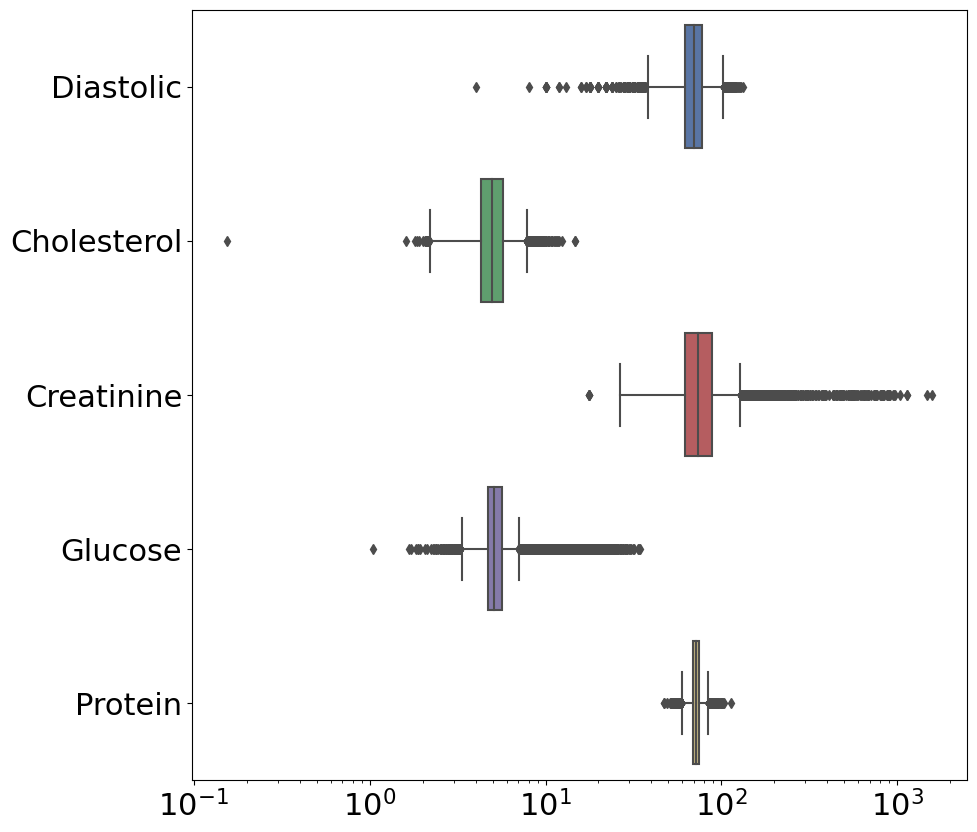

In [6]:
dfa = df.drop([ 'Gender', 'Age', 'Annual-Family-Income',
       'Ratio-Family-Income-Poverty', 'Red-Cell-Distribution-Width',
       'Weight', 'Height', 'Body-Mass-Index', 'White-Blood-Cells',
       'Lymphocyte', 'Monocyte', 'Eosinophils', 'Basophils', 'Red-Blood-Cells',
       'Hemoglobin', 'Mean-Cell-Vol', 'Mean-Cell-Hgb-Conc.',
       'Mean-cell-Hemoglobin', 'Platelet-count', 'Mean-Platelet-Vol',
       'Segmented-Neutrophils', 
       'Albumin', 'Hematocrit','ALP','AST','ALT','X60-sec-pulse',
       'GGT', 'Iron', 'LDH', 'Phosphorus', 'Bilirubin', 'Systolic', 'Uric.Acid',
       'Triglycerides', 'Total-Cholesterol', 'HDL', 'Glycohemoglobin',
       'Vigorous-work', 'Moderate-work', 'Health-Insurance', 'Diabetes',
       'Blood-Rel-Diabetes'],axis=1)
plt.figure(figsize = (10,10))
#sns.set_style("whitegrid")
plt.style.use('seaborn-deep')
#sns.set(font_scale=1)
ax =sns.boxplot(data= dfa,orient='h')
#ax.set_title('Outlier Boxplots', fontsize = 30)
ax.set(xscale="log")
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.savefig('boxplotfeature.png', dpi=500, bbox_inches='tight') # 解决图片不清晰，不完整的问题
plt.show()

In [7]:
df.shape

(37079, 48)

In [5]:
df['Diabetes_binary'] = df['Diabetes_binary'].astype('int')
df['HighBP'] = df['HighBP'].astype('int')
df['HighChol'] = df['HighChol'].astype('int')
df['CholCheck'] = df['CholCheck'].astype('int')
df['BMI'] = df['BMI'].astype('int')
df['Smoker'] = df['Smoker'].astype('int')
df['Stroke'] = df['Stroke'].astype('int')
df['HeartDiseaseorAttack'] = df['HeartDiseaseorAttack'].astype('int')
df['PhysActivity'] = df['PhysActivity'].astype('int')
df['Fruits'] = df['Fruits'].astype('int')
df['Veggies'] = df['Veggies'].astype('int')

df['HvyAlcoholConsump'] = df['HvyAlcoholConsump'].astype('int')
df['AnyHealthcare'] = df['AnyHealthcare'].astype('int')
df['NoDocbcCost'] = df['NoDocbcCost'].astype('int')
df['GenHlth'] = df['GenHlth'].astype('int')
df['MentHlth'] = df['MentHlth'].astype('int')
df['PhysHlth'] = df['PhysHlth'].astype('int')
df['DiffWalk'] = df['DiffWalk'].astype('int')
df['Sex'] = df['Sex'].astype('int')
df['Age'] = df['Age'].astype('int')
df['Education'] = df['Education'].astype('int')
df['Income'] = df['Income'].astype('int')
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


In [6]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


###异常值处理

In [4]:
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [5]:
columns = list(df.columns)
df = df.drop(detect_outliers(df,columns),axis = 0).reset_index(drop = True)


In [6]:
df = pd.DataFrame(df)

In [7]:
df.to_excel('./afterfilter.xlsx')